In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df  = pd.read_csv("DS3_C6_S1_Regression_Insurance_Data_Project.csv")

In [3]:
df.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 8)

In [117]:
def vis_num1(a):
    plt.figure(figsize=(15,6),facecolor="yellow")
    plt.subplot(131)
    plt.title("NO_OF_PEOPLE")
    plt.xlabel(a)
    plt.ylabel("COUNT")
    plt.hist(df[a],bins = 7,color = 'm',ec = 'black');

    plt.subplot(132)
    plt.title("box-plot")
    sb.boxplot(a,showmeans = True,color ='skyblue',
            data = df)




    plt.subplot(133)
    sb.kdeplot(x = df[a],shade=True,color='black')
    plt.show()
    

In [128]:
def cat_visual(a):
    plt.figure(figsize = (5,5),facecolor="yellow")
    plt.subplot(121)
    plt.pie(df[a].value_counts(),labels = df[a].unique(),autopct = '%.2f%%')
    plt.title(a)
    
    plt.figure(figsize = (5,5),facecolor="blue")
    plt.subplot(122)
    sb.countplot(data = df ,x = a,palette = 'inferno' );
    plt.show()

## HANDLING MISSING VALUES 

In [6]:
df.isnull().mean()*100

age         0.000000
sex         0.000000
bmi         0.000000
classif     0.597907
children    0.000000
smoker      0.000000
region      0.000000
charges     0.000000
dtype: float64

In [7]:
df['classif'].unique()

array(['PREO', 'OB1', 'N', 'OB2', 'OB3', nan, 'UW'], dtype=object)

In [8]:
len(df['classif'].dropna()) / len(df)

0.9940209267563528

In [9]:
df=df[~df['classif'].isna()]


In [10]:
df.isnull().mean()*100

age         0.0
sex         0.0
bmi         0.0
classif     0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [11]:
df['classif'].unique()

array(['PREO', 'OB1', 'N', 'OB2', 'OB3', 'UW'], dtype=object)

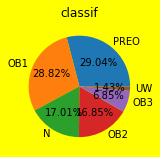

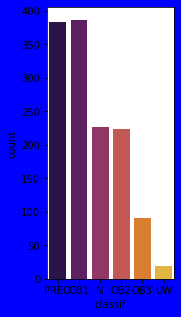

In [125]:
cat_visual("classif")

In [12]:
df.shape # only 8 rows removed 

(1330, 8)

In [13]:
df['age'].unique()

array([ 19,  18,  28,   0,  32,  31,  46,  37,  60,  25,  62,  23,  56,
        27,  52,  30,  34,  59,  63,  55,  22,  26,  35,  24,  41,  38,
        36,  21,  48,  40,  58,  53,  43,  64,  20,  61,  57,  29,  45,
        54, -58,  49,  44,  47,  51,  42,  50,  39,  33, 190,  -1],
      dtype=int64)

In [14]:
df[df['age']<0 ]

,age,sex,bmi,classif,children,smoker,region,charges
116,-58,male,49.06,OB3,0,no,southeast,11381.3254
1337,-1,female,29.07,PREO,0,yes,northwest,29141.3603


In [15]:
df.loc[(df['age']<0 ) ,'age'] = -df['age']

In [16]:
df['age'].unique()

array([ 19,  18,  28,   0,  32,  31,  46,  37,  60,  25,  62,  23,  56,
        27,  52,  30,  34,  59,  63,  55,  22,  26,  35,  24,  41,  38,
        36,  21,  48,  40,  58,  53,  43,  64,  20,  61,  57,  29,  45,
        54,  49,  44,  47,  51,  42,  50,  39,  33, 190,   1], dtype=int64)

In [17]:
df[df['age']<0 ]

,age,sex,bmi,classif,children,smoker,region,charges


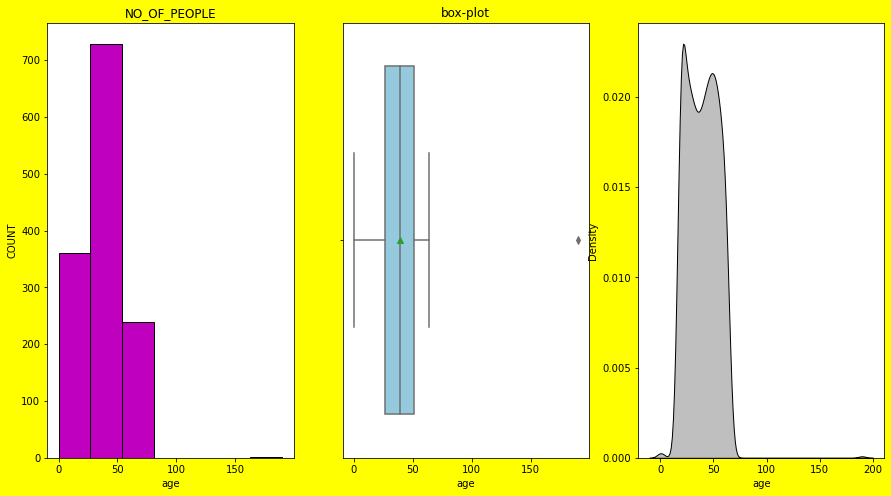

In [18]:
vis_num1('age')

In [19]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

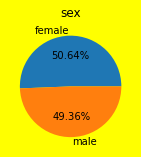

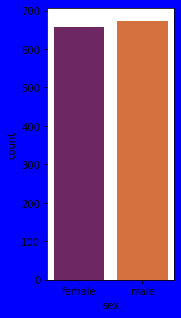

In [127]:
cat_visual("sex")

In [20]:
df['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 30.78 ,
       23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 , 28.025,
       27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315, 28.6  ,
       28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  , 26.6  ,
       36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 , 24.53 ,
       35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955, 31.825,
       31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935, 22.42 ,
       28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  , 32.01 ,
       34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285, 37.62 , 41.23 ,
       34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 , 24.795, 31.3  ,
       38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115, 29.92 , 27.5  ,
       28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 , 32.205, 28.595,
       49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975, 31.35 , 33.915,
      

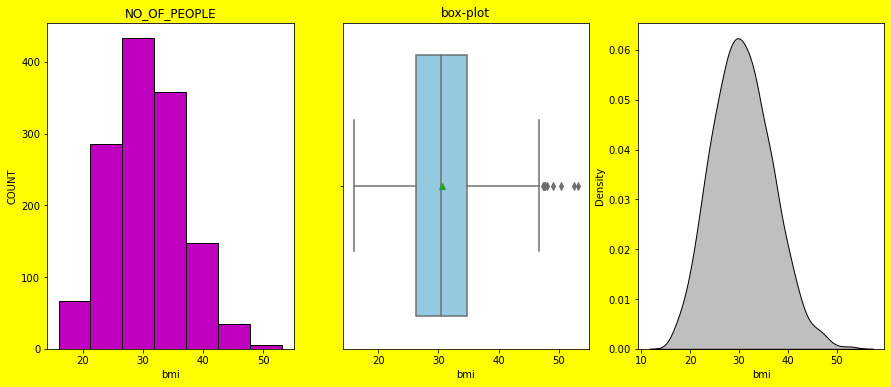

In [120]:
vis_num1('bmi')

In [22]:
df[df['bmi']>= 50 ]

,age,sex,bmi,classif,children,smoker,region,charges
847,23,male,50.38,OB3,1,no,southeast,2438.0552
1047,22,male,52.58,OB3,1,yes,southeast,44501.3982
1317,18,male,53.13,OB3,0,no,southeast,1163.4627


In [23]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

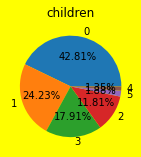

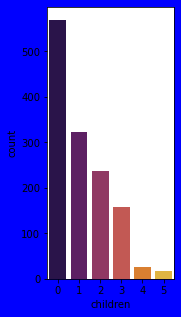

In [132]:
cat_visual("children")

In [133]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [137]:
def cat_visual(a):
    plt.figure(figsize = (5,5),facecolor="yellow")
    plt.subplot(121)
    plt.pie(df[a].value_counts().sort_values(),labels = df[a].unique(),autopct = '%.2f%%')
    plt.title(a)
    
    plt.figure(figsize = (5,5),facecolor="blue")
    plt.subplot(122)
    sb.countplot(data = df ,x = a,palette = 'inferno' );
    plt.show()

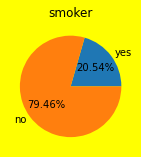

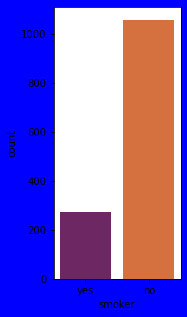

In [138]:
cat_visual('smoker')

In [134]:
df['smoker'].value_counts()

no     1056
yes     273
Name: smoker, dtype: int64

In [25]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [154]:
df['region'].value_counts().sort_values()


southwest    321
northwest    321
northeast    323
southeast    364
Name: region, dtype: int64

In [148]:
def cat_visual1(a):
    plt.figure(figsize = (5,5),facecolor="yellow")
    plt.subplot(121)
    plt.pie(df[a].value_counts(),labels = df[a].unique(),autopct = '%.2f%%')
    plt.title(a)
    
    plt.figure(figsize = (10,5),facecolor="skyblue")
    plt.subplot(122)
    sb.countplot(data = df ,x = a,palette = 'inferno' );
    plt.show()

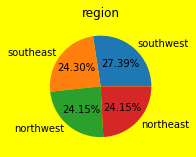

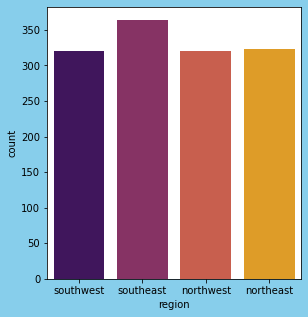

In [149]:
cat_visual1("region")

In [26]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

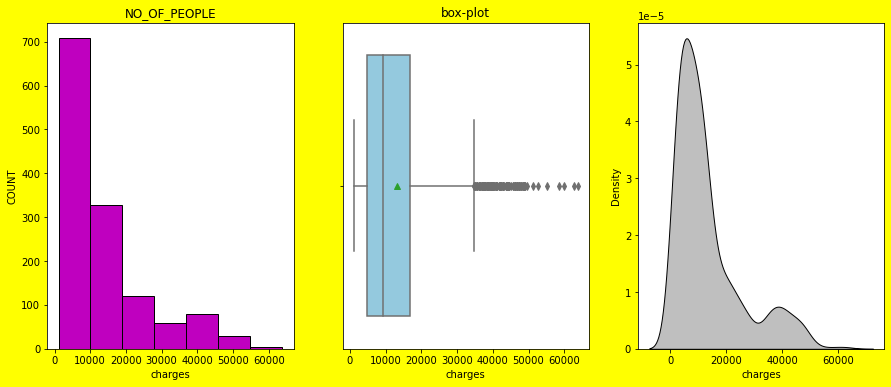

In [119]:
vis_num1('charges')

In [28]:
df[df['charges']>= 30000 ]

,age,sex,bmi,classif,children,smoker,region,charges
14,27,male,42.130,OB3,0,yes,southeast,39611.75770
19,30,male,35.300,OB2,0,yes,southwest,36837.46700
23,34,female,31.920,OB1,1,yes,northeast,37701.87680
29,31,male,36.300,OB2,2,yes,southwest,38711.00000
30,22,male,35.600,OB2,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...,...
1301,62,male,30.875,OB1,3,yes,northwest,46718.16325
1303,43,male,27.800,PREO,0,yes,southwest,37829.72420
1308,25,female,30.200,OB1,0,yes,southwest,33900.65300
1313,19,female,34.700,OB1,2,yes,southwest,36397.57600


## DATA EXPLORATION 


In [29]:
df.columns

Index(['age', 'sex', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1330 non-null   int64  
 1   sex       1330 non-null   object 
 2   bmi       1330 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1330 non-null   int64  
 5   smoker    1330 non-null   object 
 6   region    1330 non-null   object 
 7   charges   1330 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 125.8+ KB


<AxesSubplot:xlabel='age', ylabel='charges'>

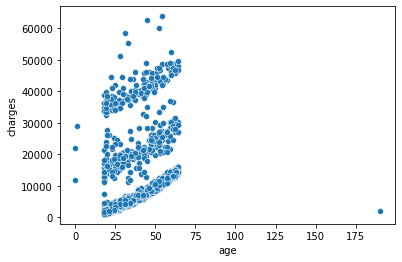

In [31]:
sb.scatterplot(df['age'],df['charges'])

In [32]:
df.describe()

,age,bmi,children,charges
count,1330.000000,1330.000000,1330.000000,1330.000000
mean,39.262406,30.670391,1.096992,13292.686109
std,14.727304,6.100324,1.207105,12120.545602
min,0.000000,15.960000,0.000000,1121.873900
25%,26.250000,26.296250,0.000000,4746.521225
50%,39.000000,30.380000,1.000000,9388.753650
75%,51.000000,34.693750,2.000000,16746.657400
max,190.000000,53.130000,5.000000,63770.428010


In [33]:
df=df[df['age']<80] # removing the outlier 

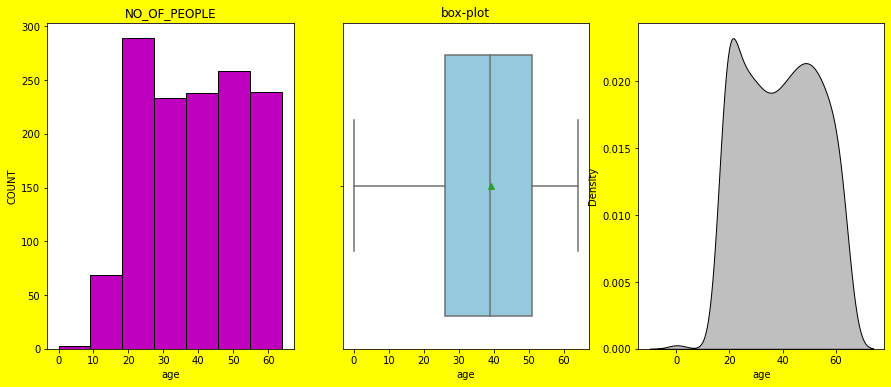

In [118]:
vis_num1('age')

In [34]:
df.describe()

,age,bmi,children,charges
count,1329.000000,1329.000000,1329.000000,1329.000000
mean,39.148984,30.670523,1.097818,13301.086602
std,14.139806,6.102619,1.207183,12121.234360
min,0.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.290000,0.000000,4747.052900
50%,39.000000,30.360000,1.000000,9391.346000
75%,51.000000,34.700000,2.000000,16776.304050
max,64.000000,53.130000,5.000000,63770.428010


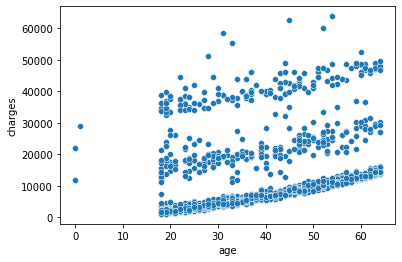

In [35]:
sb.scatterplot(df['age'],df['charges']);

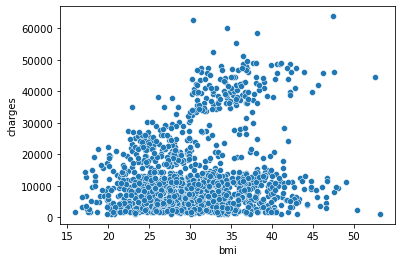

In [36]:
sb.scatterplot(df['bmi'],df['charges']);

  classif       charges
0      UW   7595.253968
1       N  10448.399945
2    PREO  10998.374214
3     OB1  14516.468194
4     OB3  16784.615546
5     OB2  17090.900977


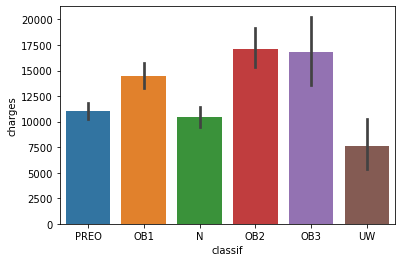

In [37]:
a = df.groupby(by=['classif'])['charges'].mean().sort_values()
a = a.to_frame().reset_index()
print(a)
sb.barplot(df['classif'],df['charges']);

      sex       charges
0  female  12581.693320
1    male  14002.307987


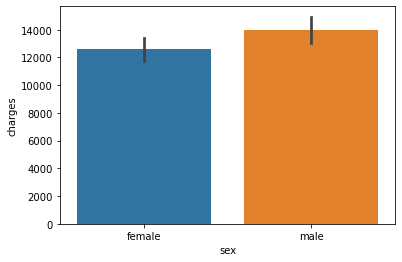

In [38]:
b = df.groupby(by=['sex'])['charges'].mean().sort_values()
b = b.to_frame().reset_index()
print(b)
sb.barplot(df['sex'],df['charges']);

   children       charges
0         5   8786.035247
1         0  12419.918141
2         1  12788.249657
3         4  13850.656311
4         2  15030.227966
5         3  15355.318367


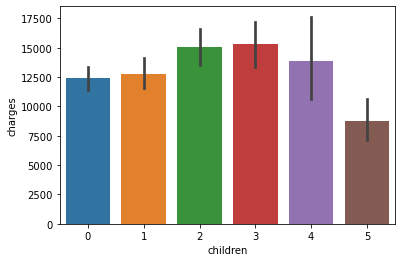

In [39]:
c = df.groupby(by=['children'])['charges'].mean().sort_values()
c = c.to_frame().reset_index()
print(c)
sb.barplot(df['children'],df['charges']);

  smoker       charges
0     no   8454.654127
1    yes  32047.726504


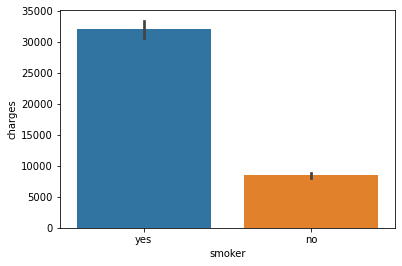

In [40]:
d = df.groupby(by=['smoker'])['charges'].mean().sort_values()
d = d.to_frame().reset_index()
print(d)
sb.barplot(df['smoker'],df['charges']);

      region       charges
0  northwest  12419.254735
1  southwest  12421.023590
2  northeast  13435.681077
3  southeast  14735.411438


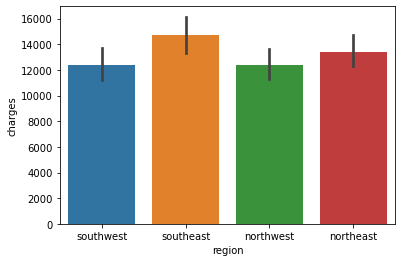

In [41]:
e = df.groupby(by=['region'])['charges'].mean().sort_values()
e = e.to_frame().reset_index()
print(e)
sb.barplot(df['region'],df['charges']);

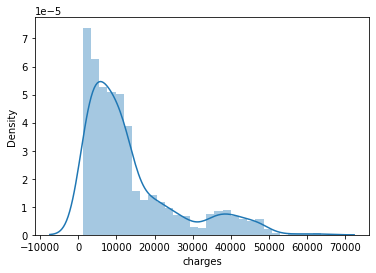

In [42]:
sb.distplot(df['charges']);

## DATA PREPARATION FOR MACHINE LEARNING MODEL 

In [43]:
ml = df.copy()

In [44]:
ml.shape

(1329, 8)

In [45]:
ml.columns

Index(['age', 'sex', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

# checking relationship classif with charges 

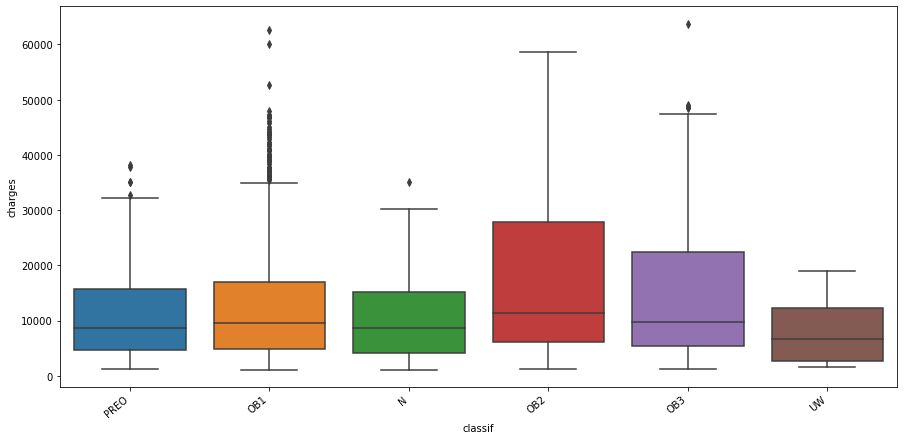

In [155]:

plt.subplots(figsize=(15,7))
ax=sb.boxplot(x='classif',y='charges',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

# checking relationship of charges with bmi 

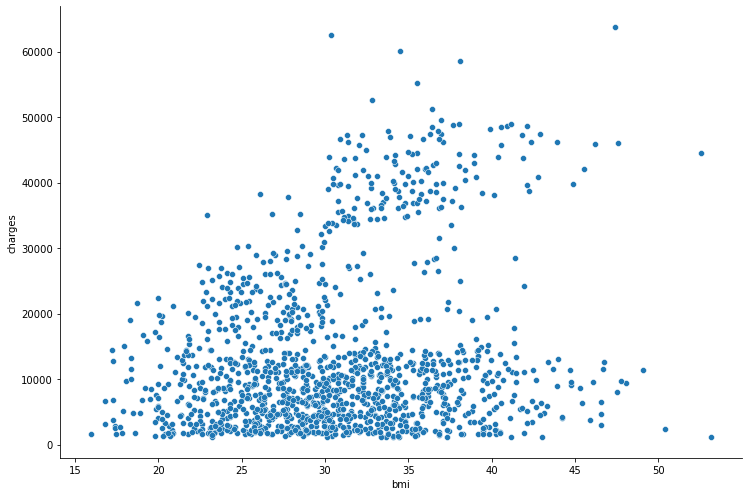

In [158]:
sb.relplot(x='bmi',y='charges',data=df,height=7,aspect=1.5);


## feature engineering 

In [46]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1329 non-null   int64  
 1   sex       1329 non-null   object 
 2   bmi       1329 non-null   float64
 3   classif   1329 non-null   object 
 4   children  1329 non-null   int64  
 5   smoker    1329 non-null   object 
 6   region    1329 non-null   object 
 7   charges   1329 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 93.4+ KB


In [47]:
ml.sex=ml.sex.astype('category')
ml.smoker=ml.smoker.astype('category')
ml.region=ml.region.astype('category')
ml.classif=ml.classif.astype('category')

In [48]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1329 non-null   int64   
 1   sex       1329 non-null   category
 2   bmi       1329 non-null   float64 
 3   classif   1329 non-null   category
 4   children  1329 non-null   int64   
 5   smoker    1329 non-null   category
 6   region    1329 non-null   category
 7   charges   1329 non-null   float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 57.8 KB


In [49]:
from sklearn import preprocessing 
label_encoder=preprocessing.LabelEncoder()
# Encode Label in column 'species 
ml['sex']=label_encoder.fit_transform(ml['sex'])
ml['smoker']=label_encoder.fit_transform(ml['smoker'])
ml['region']=label_encoder.fit_transform(ml['region'])
ml['classif']=label_encoder.fit_transform(ml['classif'])

In [50]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1329 non-null   int64  
 1   sex       1329 non-null   int32  
 2   bmi       1329 non-null   float64
 3   classif   1329 non-null   int32  
 4   children  1329 non-null   int64  
 5   smoker    1329 non-null   int32  
 6   region    1329 non-null   int32  
 7   charges   1329 non-null   float64
dtypes: float64(2), int32(4), int64(2)
memory usage: 72.7 KB


## feature scailing 

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [52]:
# defining method to perform data scaling operation based on the type of scaling 
def feature_scale(scale):
  numerics=['int16','int32','int64','float16','float32','float64']
  new_df=ml.select_dtypes(include=numerics)
  if scale == 'minmax':
    scaler= MinMaxScaler()
  else:
    scaler=StandardScaler()
  df_scaled=pd.DataFrame(scaler.fit_transform(new_df.to_numpy()),columns=new_df.columns)
  return df_scaled

In [53]:
# scaling data using minmax scaling process
scale='minmax'
scaled_df=feature_scale(scale)
scaled_df.columns

Index(['age', 'sex', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [54]:
scaled_df.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,0.296875,0.0,0.321227,0.8,0.0,1.0,1.000000,0.251611
1,0.281250,1.0,0.479150,0.2,0.2,0.0,0.666667,0.009636
2,0.437500,1.0,0.458434,0.2,0.6,0.0,0.666667,0.053115
3,0.000000,1.0,0.181464,0.0,0.0,0.0,0.333333,0.333010
4,0.500000,1.0,0.347592,0.8,0.0,0.0,0.333333,0.043816


## identifying the independent and dependent features 

In [55]:
x = scaled_df.iloc[:,0:7]
y = scaled_df.iloc[:,-1]

### dataframe 

In [56]:
print(x.shape)
print(y.shape)

(1329, 7)
(1329,)


In [57]:
x.head(1)

,age,sex,bmi,classif,children,smoker,region
0,0.296875,0.0,0.321227,0.8,0.0,1.0,1.0


In [58]:
y.head(1)

0    0.251611
Name: charges, dtype: float64

#### numpy 

In [59]:
x_n = scaled_df.iloc[:,0:7].values
y_n = scaled_df.iloc[:,-1].values
print(x_n.shape)
print(y_n.shape)

(1329, 7)
(1329,)


In [60]:
x_n

array([[0.296875  , 0.        , 0.3212268 , ..., 0.        , 1.        ,
        1.        ],
       [0.28125   , 1.        , 0.47914985, ..., 0.2       , 0.        ,
        0.66666667],
       [0.4375    , 1.        , 0.45843422, ..., 0.6       , 0.        ,
        0.66666667],
       ...,
       [0.28125   , 0.        , 0.56201238, ..., 0.        , 0.        ,
        0.66666667],
       [0.328125  , 0.        , 0.26472962, ..., 0.        , 0.        ,
        1.        ],
       [0.015625  , 0.        , 0.35270379, ..., 0.        , 1.        ,
        0.33333333]])

In [61]:
y_n

array([0.25161076, 0.00963595, 0.05311516, ..., 0.00810808, 0.01414352,
       0.44724873])

In [62]:
correlation = scaled_df.corr()
correlation

,age,sex,bmi,classif,children,smoker,region,charges
age,1.000000,-0.022602,0.114692,0.007158,0.047451,-0.029868,0.009800,0.290760
sex,-0.022602,1.000000,0.046570,-0.009379,0.015176,0.077313,0.002906,0.058618
bmi,0.114692,0.046570,1.000000,0.083867,0.015256,0.007113,0.158637,0.202033
classif,0.007158,-0.009379,0.083867,1.000000,-0.029261,-0.010536,0.015196,-0.038830
children,0.047451,0.015176,0.015256,-0.029261,1.000000,0.005087,0.015356,0.065566
smoker,-0.029868,0.077313,0.007113,-0.010536,0.005087,1.000000,-0.000506,0.786664
region,0.009800,0.002906,0.158637,0.015196,0.015356,-0.000506,1.000000,-0.004859
charges,0.290760,0.058618,0.202033,-0.038830,0.065566,0.786664,-0.004859,1.000000


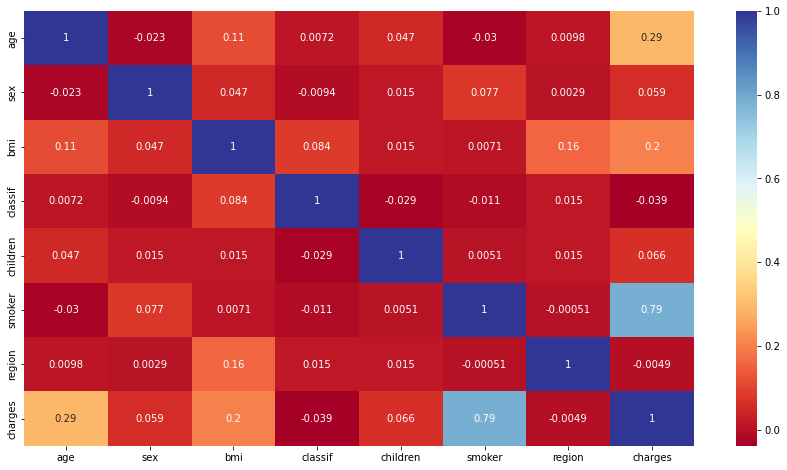

In [63]:
plt.figure(figsize=(15,8))
sb.heatmap(data = correlation,annot = True,cmap = 'RdYlBu' );

# splitting the data for traininjg and testing 

In [64]:
# train_test split 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.3 ,random_state = 30 )
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(930, 7) (399, 7) (930,) (399,)


In [65]:
x_train.head(1)

,age,sex,bmi,classif,children,smoker,region
302,0.4375,0.0,0.310465,0.8,0.4,0.0,1.0


In [66]:
x_test.head(1)

,age,sex,bmi,classif,children,smoker,region
648,0.921875,0.0,0.517622,0.4,0.0,0.0,0.666667


In [67]:
y_train

302     0.304170
973     0.053927
61      0.463614
788     0.274370
1100    0.028448
          ...   
919     0.174153
1164    0.159170
500     0.077456
941     0.300272
421     0.138343
Name: charges, Length: 930, dtype: float64

In [68]:
y_test

648     0.177541
1322    0.183680
1098    0.125562
128     0.199438
327     0.371465
          ...   
838     0.139681
591     0.071398
884     0.148464
1257    0.411895
1221    0.172652
Name: charges, Length: 399, dtype: float64

In [69]:
scaled_df.columns

Index(['age', 'sex', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

# linear regression 

In [70]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score,mean_absolute_error


In [71]:
lr=LinearRegression()
s_model =lr.fit(x_train,y_train)
y_predict=s_model.predict(x_test)
print("r2 score",r2_score(y_test,y_predict))

r2 score 0.748731235763133


In [72]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.3 ,random_state = i )
    lr=LinearRegression()
    s_model =lr.fit(x_train,y_train)
    y_predict=s_model.predict(x_test)
#     print("r2 score",r2_score(y_test,y_predict))
    scores.append(r2_score(y_test,y_predict))

In [73]:
scores

[0.7187447110789211,
 0.6984920454568675,
 0.7003671592069194,
 0.7477855811910095,
 0.7175187016964094,
 0.7583090158069282,
 0.7615242083263867,
 0.700620116312628,
 0.7215718879638378,
 0.76552339280493,
 0.7763851489398615,
 0.7501706463470564,
 0.6596482120679803,
 0.7322947993249501,
 0.7713952736581111,
 0.7677039685963332,
 0.732919833057393,
 0.7684950889213381,
 0.7411190990534648,
 0.757141226880618,
 0.7512135422630678,
 0.74362264184111,
 0.7475787797463296,
 0.7490453836336705,
 0.7450923915236626,
 0.7293815871580861,
 0.7555397509364701,
 0.7187302282566288,
 0.7773388154120084,
 0.7632425788161715,
 0.748731235763133,
 0.7299115405675987,
 0.6955181372710441,
 0.7692382316238594,
 0.6756930014056628,
 0.7699872366510868,
 0.7527138431529118,
 0.7549810658817159,
 0.7553389882308723,
 0.7136880051250616,
 0.7443036030742181,
 0.7594168042703832,
 0.7676500439823909,
 0.773027608772185,
 0.7673849537973656,
 0.7380368292011367,
 0.706233686143195,
 0.7369360890462056,
 0

In [74]:
np.argmax(scores)

441

In [75]:
scores[np.argmax(scores)]

0.8079644093352455

# The best model is found at a certain random state

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
s_model =lr.fit(x_train,y_train)
y_predict=s_model.predict(x_test)
print("r2 score",r2_score(y_test,y_predict))
print('MAE',mean_absolute_error(y_test,y_predict))

r2 score 0.8210114032550498
MAE 0.06076408251267007


In [77]:
s1_train = round(r2_score(y_train,s_model.predict(x_train))*100,2)
s1_train

74.06

In [78]:
s1_test = round(r2_score(y_test,y_predict)*100,2)
s1_test

82.1

In [79]:
print("y-intercept : ",s_model.intercept_)

y-intercept :  -0.10207919603264434


In [80]:
print("slope : ",s_model.coef_)

slope :  [ 0.25543979 -0.00139415  0.19922046 -0.03103428  0.03302427  0.37919943
 -0.01809086]


In [81]:
scaled_df.columns

Index(['age', 'sex', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

## KNN

In [82]:
# x_n = scaled_df.iloc[:,0:7].values
# y_n = scaled_df.iloc[:,-1].values
# print(x_n.shape)
# print(y_n.shape)

In [83]:
# train_test split 
from sklearn.model_selection import train_test_split 
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_n,y_n,test_size =.3 ,random_state = 441 )
print(x_train.shape,x_test.shape)

(1196, 7) (133, 7)


In [84]:
x_train1


array([[0.953125  , 1.        , 0.47282755, ..., 0.        , 0.        ,
        0.        ],
       [0.78125   , 0.        , 0.38081786, ..., 0.2       , 0.        ,
        0.33333333],
       [0.65625   , 1.        , 0.5708905 , ..., 0.4       , 0.        ,
        0.66666667],
       ...,
       [0.625     , 0.        , 0.68496099, ..., 0.2       , 0.        ,
        0.33333333],
       [0.296875  , 1.        , 0.30414313, ..., 0.4       , 0.        ,
        0.33333333],
       [0.46875   , 1.        , 0.3424805 , ..., 0.6       , 1.        ,
        0.33333333]])

In [85]:
y_test1

array([6.61778122e-02, 1.62248993e-01, 5.34664642e-01, 2.53629900e-02,
       2.04566455e-01, 7.19555492e-01, 1.35316786e-02, 2.25467271e-02,
       3.06844975e-02, 1.16854941e-01, 1.85305565e-01, 3.94200015e-02,
       8.58497387e-02, 1.24013486e-01, 1.18885232e-01, 1.14317192e-01,
       1.99294222e-01, 1.95833492e-01, 7.30737312e-02, 1.69452832e-01,
       1.10214718e-01, 2.84656949e-01, 7.33195823e-01, 2.01536949e-01,
       1.35742097e-01, 4.96907414e-02, 1.43083463e-01, 8.13980957e-03,
       6.16193697e-01, 5.80421622e-01, 1.39579134e-01, 4.12217111e-02,
       7.74560701e-02, 1.09573181e-01, 4.61969267e-01, 1.91051656e-03,
       4.68779941e-02, 8.10006579e-02, 1.57917464e-01, 8.69796682e-02,
       1.66500732e-01, 3.75034306e-02, 4.63906362e-01, 4.37254425e-02,
       8.44760773e-02, 1.97115261e-01, 7.40234491e-01, 1.10061395e-01,
       8.95029595e-03, 9.83204128e-02, 3.88954922e-02, 1.48998012e-02,
       2.90964337e-01, 8.20226033e-03, 2.51832540e-02, 2.54139425e-01,
      

In [86]:
from sklearn.neighbors import KNeighborsRegressor

In [87]:
# finding the value of k 

In [88]:
# 2nd method for finding the value of k 
accuracy = []
for i in range(1,21):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train1, y_train1)
    accuracy.append(r2_score(y_test1,knn.predict(x_test1)))


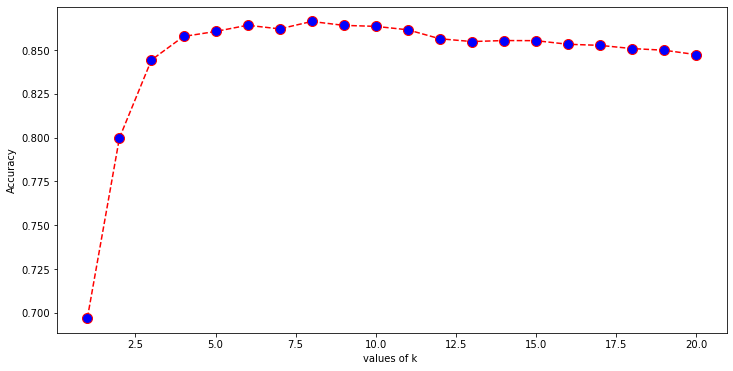

In [89]:
plt.figure(figsize=(12,6))
plt.ylabel("Accuracy")
plt.xlabel("values of k ")
plt.plot(range(1,21),accuracy,color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10);

In [90]:
k2 = 6
knn = KNeighborsRegressor(n_neighbors=k2)
knn.fit(x_train1, y_train1)
y_pred1 = knn.predict(x_test1)

In [91]:
r2_score(y_train1,knn.predict(x_train1))

0.8545936020071325

In [92]:
r2_score(y_test1,y_pred1)

0.864129055531385

In [93]:
s2_train = round(r2_score(y_train1,knn.predict(x_train1))*100,2)
s2_train

85.46

In [94]:
s2_test = round(r2_score(y_test1,knn.predict(x_test1))*100,2)
s2_test

86.41

# descision tree regressor 

In [95]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn import tree

In [96]:
dtr_model=DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10)
dtr_model.fit(x_train,y_train)
y_pred=dtr_model.predict(x_test)
print("R-Squared on train dataset :",round(dtr_model.score(x_train,y_train),3))
print("R-Squared on test dataset: ",round(dtr_model.score(x_test,y_test),3))

R-Squared on train dataset : 0.853
R-Squared on test dataset:  0.927


In [97]:
s3_train = round(r2_score(y_train,dtr_model.predict(x_train))*100,2)
s3_train

85.33

In [98]:
s3_test = round(r2_score(y_test,dtr_model.predict(x_test))*100,2)
s3_test

92.7


# random forest regressor 

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
# Defining model
model2 = RandomForestRegressor()

#Evaluate the model
cv1 = KFold(n_splits=10,random_state=None,shuffle=False)
RF_score1 = cross_val_score(model2,x,y,scoring='r2',cv=cv1,n_jobs=-1,error_score='raise')
# results.append(RF_score1)
# names.append('Random forest')
print(RF_score1)
print("r2 value :",RF_score1.mean())

[0.88120356 0.83103567 0.81501249 0.72205305 0.85411721 0.88585899
 0.84906924 0.79977702 0.83754916 0.85881827]
r2 value : 0.8334494661397193


In [102]:
# s4_train = r2_score(y_train,model2.predict(x_train))
# s4_train

In [103]:
s4_train = '--'

In [104]:
s4_test = round(RF_score1.mean()*100,2)
s4_test

83.34

# ADABOOST 

In [105]:
from sklearn.ensemble import AdaBoostRegressor

In [106]:
# Defining model
model3 = AdaBoostRegressor()

#Evaluate the model
cv1 = KFold(n_splits=10,random_state=None,shuffle=False)
RF_score = cross_val_score(model3,x,y,scoring='r2',cv=cv1,n_jobs=-1,error_score='raise')

print(RF_score)
print("r2 value :",RF_score.mean())

[0.82320041 0.82087926 0.81661635 0.73953734 0.84021792 0.85743791
 0.8387342  0.79494294 0.81655047 0.83829984]
r2 value : 0.8186416646536593


In [107]:
s5_train = '--'

In [108]:
s5_test = round(RF_score.mean()*100,2)
s5_test

81.86

In [109]:
RESULTS = pd.DataFrame()

In [110]:
RESULTS

""


In [111]:
RESULTS['MODELS'] = ['LINEAR_REGRESSION','KNN','DESCISION_TREE','RANDOM_FOREST','ADABOOST']

In [112]:
RESULTS['TRAIN_SCORE'] = s1_train,s2_train,s3_train,s4_train,s5_train

In [113]:
RESULTS['TEST_SCORE'] = s1_test,s2_test,s3_test,s4_test,s5_test

In [114]:
RESULTS

,MODELS,TRAIN_SCORE,TEST_SCORE
0,LINEAR_REGRESSION,74.06,82.10
1,KNN,85.46,86.41
2,DESCISION_TREE,85.33,92.70
3,RANDOM_FOREST,--,83.34
4,ADABOOST,--,81.86


In [115]:
RESULTS.sort_values(by = 'TEST_SCORE',ascending = False)

,MODELS,TRAIN_SCORE,TEST_SCORE
2,DESCISION_TREE,85.33,92.70
1,KNN,85.46,86.41
3,RANDOM_FOREST,--,83.34
0,LINEAR_REGRESSION,74.06,82.10
4,ADABOOST,--,81.86
